# Extracto del grupo de Telegram

Paduel, [28.11.20 11:16]
@CarlosBL  me he dado cuenta que lo que te he puesto antes es totalmente incorrecto

Paduel, [28.11.20 11:17]
no puedes tomar los precios históricos para calcular eso, debes hacerlo con retornos y luego reconstruir un equity semanal en base 1

Paduel, [28.11.20 11:23]
para el ejemplo he tomado las barras de 15 minutos de Yahoo Finance, solo te da los últimos 60 días, pero el código del cálculo servirá igual con otro activo, o mercado y un histórico más amplio

SPY


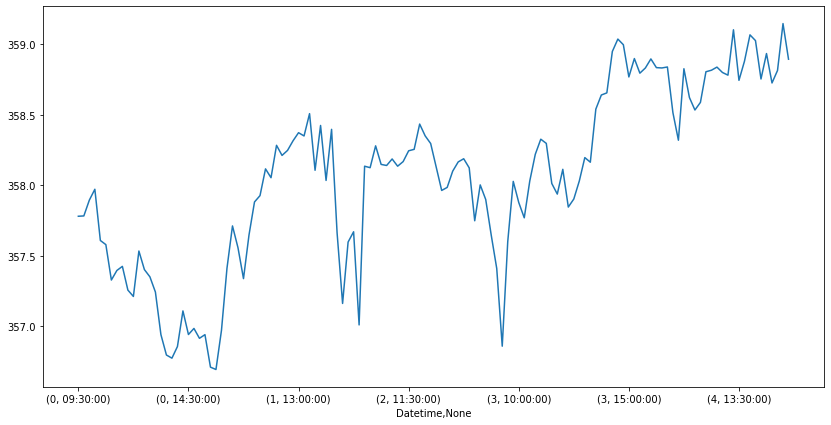

In [1]:
import pandas as pd
from yfinance import download
from datetime import datetime, timedelta

symbol= "SPY"

start = datetime.today() - timedelta(days=59)
data = download(symbol, interval="15m", start=start, progress=False)

returns = data['Adj Close']['2006':].pct_change()
returns_by_time = returns.groupby([returns.index.dayofweek, returns.index.time]).mean()

equity_mean_by_time = returns_by_time.add(1).cumprod()
equity_mean_by_time = equity_mean_by_time.div(equity_mean_by_time.iloc[0])

price_start_week = data["Adj Close"][(data.index.dayofweek==equity_mean_by_time.index[0][0]) & (data.index.time==equity_mean_by_time.index[0][1])].iloc[-1]
print(symbol)
equity_mean_by_time.mul(price_start_week).plot(figsize=(14,7));